# Discovery of hidden symmetries and conservation laws

## Task 1

### Dataset Preparation:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, Subset
import numpy as np
from PIL import Image
import os

# Define rotation angles
ROTATION_ANGLES = [30 * i for i in range(1, 12)]  # [30, 60, ..., 330]

# Directory to save rotated dataset
SAVE_DIR = "rotated_mnist"
os.makedirs(SAVE_DIR, exist_ok=True)

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])

dataset = MNIST(root="./data", train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.34MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
import matplotlib.pyplot as plt

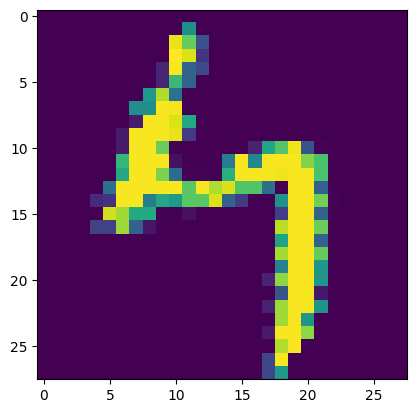

In [4]:
image_pil = transforms.ToPILImage()(dataset[0][0])
rotated_image = image_pil.rotate(60)
rotated_image_tensor = transforms.ToTensor()(rotated_image)
plt.imshow((rotated_image_tensor).squeeze())

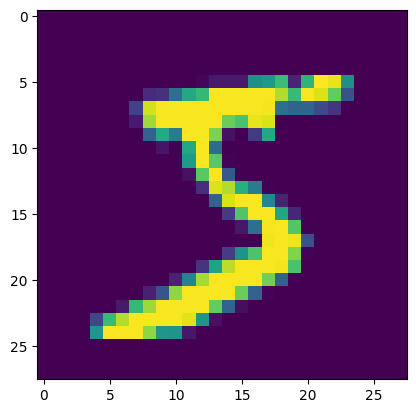

In [5]:
plt.imshow((dataset[0][0]).squeeze())

In [6]:
len(dataset)

60000

In [7]:
from tqdm.auto import tqdm

In [8]:
import h5py
import numpy as np
from tqdm.auto import tqdm
from torchvision import transforms
from torch.utils.data import Subset

# Define rotation angles
ROTATION_ANGLES = list(range(0, 360, 30))  # 0, 30, 60, ..., 330

# Create a dictionary to store rotated images for each digit (0-9)
digit_data = {digit: [] for digit in range(10)}

# Define the HDF5 file
with h5py.File("rotated_digits.hdf5", "w") as hdf5_file:
    for idx, (image, label) in tqdm(enumerate(dataset), total=len(dataset)):
        image_pil = transforms.ToPILImage()(image)  # Convert tensor to PIL image
        rotated_images = [transforms.ToTensor()(image_pil.rotate(angle)).numpy() for angle in ROTATION_ANGLES]
        
        digit_data[label].append(np.stack(rotated_images, axis=0))  # Shape: [12, C, H, W]

    # Save each digit dataset
    for digit, images in digit_data.items():
        if images:
            hdf5_file.create_dataset(f"digit_{digit}", data=np.array(images, dtype=np.float32))

  0%|          | 0/60000 [00:00<?, ?it/s]

In [9]:
import os
import shutil

# Define the output directory
output_dir = "/kaggle/working"

# List all files in the directory
for filename in os.listdir(output_dir):
    if filename != "rotated_digits.hdf5":  # Keep only the HDF5 file
        file_path = os.path.join(output_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)  # Remove files
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Remove directories

print("Cleanup complete. Only rotated_digits.hdf5 remains.")

Cleanup complete. Only rotated_digits.hdf5 remains.
